In [1]:
import torch

import matplotlib.pyplot as plt
from torchsummary import summary
import numpy as np

from model import Model
from custom_utils import load_diseases_data
from nets import ResNet

device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [2]:
train_images, train_labels, test_images, test_labels = load_diseases_data()

train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

(torch.Size([1894, 150, 100]),
 torch.Size([1894, 5, 2]),
 torch.Size([335, 150, 100]),
 torch.Size([335, 5, 2]))

In [3]:
net = ResNet().to(device)
net

ResNet(
  (conv): Sequential(
    (0): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (10): ReLU()
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (12): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
    (13): Flatten(start_dim=1, end_dim=-1)
  )
  (d1): Linear(in_features=1280, out_features=500, bias=True)
  (d2): Linear(in_features=500, out_features=200, bias=True)
  (d2_res): Linear(in_features=200, out_features=200, bias=True)
  (d3): Linear(in_features=200, out_fea

In [4]:
disease_indxs = torch.unique(torch.where(train_labels[:, :, 1] == 1)[0])
disease_indxs.shape

torch.Size([1306])

In [19]:
model = Model(
    model=net, 
    train_input=train_images, #[disease_indxs], 
    train_label=train_labels, #[disease_indxs],
    test_input=test_images,
    test_label=test_labels
)

In [21]:
model.compile(
    optimizer=torch.optim.Adam, 
    lr=0.00001,
    loss=torch.nn.MSELoss()
)

In [11]:
model.train(
    epochs=50,
    batch_size=16
)

EPOCH [1/50], ====================> 100%, Loss = 4.957802957505919e-06, Accuracy = 100.0
Loss = 0.00006, Accuracy = 99.989%
Test loss = 0.01333, Test accuracy = 98.567%
EPOCH [2/50], ====================> 100%, Loss = 1.8579847846922348e-06, Accuracy = 100.0
Loss = 0.00006, Accuracy = 99.989%
Test loss = 0.01341, Test accuracy = 98.627%
EPOCH [3/50], ====================> 100%, Loss = 4.953514007866033e-07, Accuracy = 100.0
Loss = 0.00006, Accuracy = 99.989%
Test loss = 0.01345, Test accuracy = 98.507%
EPOCH [4/50], ====================> 100%, Loss = 2.9216878374427324e-06, Accuracy = 100.0
Loss = 0.00006, Accuracy = 99.989%
Test loss = 0.01352, Test accuracy = 98.507%
EPOCH [5/50], ====================> 100%, Loss = 1.5815805909369374e-06, Accuracy = 100.0
Loss = 0.00006, Accuracy = 99.989%
Test loss = 0.01356, Test accuracy = 98.507%
EPOCH [6/50], ====================> 100%, Loss = 2.4862363261490827e-06, Accuracy = 100.0
Loss = 0.00006, Accuracy = 99.989%
Test loss = 0.01356, Test a

In [12]:
torch.where(test_labels[:, 3, 1] == 1)

(tensor([  4,  45,  46,  47,  54,  55,  56, 220, 221, 288], device='cuda:0'),)

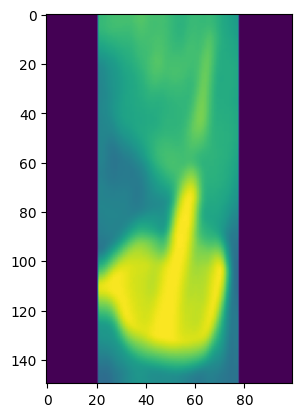

In [15]:
plt.imshow(test_images[4].cpu().numpy())

In [16]:
net(test_images[None, 4]), test_labels[4]

(tensor([[[ 9.9348e-01,  3.1916e-03],
          [ 1.0029e+00, -1.5261e-03],
          [-8.3315e-04,  1.0010e+00],
          [ 2.3805e-03,  1.0007e+00],
          [-4.3479e-03,  1.0009e+00]]], device='cuda:0',
        grad_fn=<ReshapeAliasBackward0>),
 tensor([[1., 0.],
         [1., 0.],
         [0., 1.],
         [0., 1.],
         [0., 1.]], device='cuda:0'))

<Figure size 640x480 with 0 Axes>

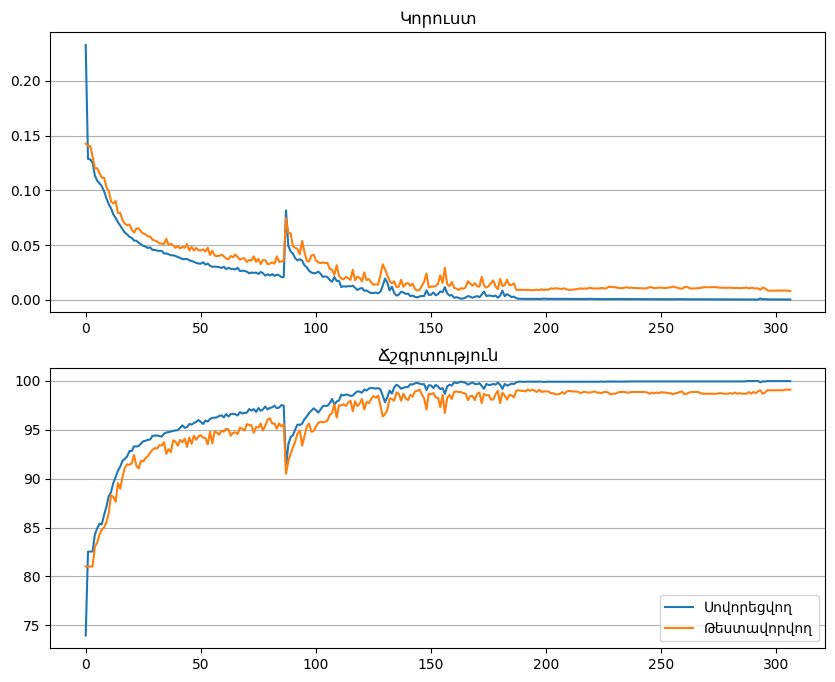

In [24]:
model.draw_plots()

In [17]:
# torch.save(net, '../models/disease_resnet.pt')

In [ ]:
(train_labels[:, 0, 1] == 1).sum(), (train_labels[:, 1, 1] == 1).sum(), (train_labels[:, 2, 1] == 1).sum(), (train_labels[:, 3, 1] == 1).sum(), (train_labels[:, 4, 1] == 1).sum()

(tensor(554, device='cuda:0'),
 tensor(676, device='cuda:0'),
 tensor(121, device='cuda:0'),
 tensor(74, device='cuda:0'),
 tensor(260, device='cuda:0'))

In [ ]:
(test_labels[:, 0, 1] == 1).sum(), (test_labels[:, 1, 1] == 1).sum(), (test_labels[:, 2, 1] == 1).sum(), (test_labels[:, 3, 1] == 1).sum(), (test_labels[:, 4, 1] == 1).sum()

(tensor(102, device='cuda:0'),
 tensor(120, device='cuda:0'),
 tensor(17, device='cuda:0'),
 tensor(10, device='cuda:0'),
 tensor(38, device='cuda:0'))

In [ ]:
(train_labels.sum(axis=1)[:, 0] == 5).sum()

tensor(593, device='cuda:0')

In [ ]:
(test_labels.sum(axis=1)[:, 0] == 5).sum()

tensor(106, device='cuda:0')

In [ ]:
train_labels.size(0)

1894

In [ ]:
test_labels.size(0)

335